# COVID-19

### Covid-19 striked the entire world in 2020. In Brazil, the disease killed almost 400 thousand¹ people since the begning of the pandemic in the country (March 2021). Manaus, the capital of Amazonas State, and the most crowded city in the North area of the country, suffered terribly with the pandemic, due to its tropical climate which creates a favorable environment for many other seasonal diseases such as yellow fever, chicungunha, dengue fever, malaria and tuberculosis. The facts becomes even more drastic when we consider that Amazonas has the highest mortality rate for tuberculosis in Brazil.


¹https://www.google.com/search?client=ubuntu&hs=SRm&channel=fs&sxsrf=ALeKk00qA_TGdHJdFlDEOZusdfFZ1oj2DQ:1619293222545&q=deaths+brazil+covid+19&spell=1&sa=X&ved=2ahUKEwjEjcSq0ZfwAhUxC9QKHRibA4EQBSgAegQIARA3&biw=1232&bih=653

### Manaus quickly became famous in the entire world due to its situation:

<img src="./images/Screenshot from 2021-04-24 15-33-12.png">

At https://www1.folha.uol.com.br/internacional/en/scienceandhealth/2020/12/in-manaus-the-incidence-of-covid-19-is-76-according-to-a-study-rate-in-sp-is-29.shtml

<img src="./images/Screenshot from 2021-04-24 15-33-53.png">

At https://www.aljazeera.com/news/2021/1/25/doctors-fear-manaus-covid-crisis-could-spread-across-brazil

<img src="./images/Screenshot from 2021-04-24 15-34-03.png">

At https://www.dw.com/en/how-a-coronavirus-variant-is-overrunning-brazil/a-56776626

<img src="./images/Screenshot from 2021-04-24 15-34-45.png">

At https://www.theguardian.com/science/audio/2021/feb/02/covid-19-what-can-we-learn-from-manaus-podcast

### Coming from Amazonas, and studing pulmonary diseases for the past 3 years¹, it is saddly to see your people suffering and where the situation is going. Due to that, I'm going to analyze some data from COVID-19 in Brazil and reflect about their impacts from someone who is coming from the "world capital of COVID-19"¹.

¹(in portuguese, PT-BR) https://www.bbc.com/portuguese/brasil-55681527

# Dataset

As data we are going to use public data from municipal and state Health Departments of Brazil. The dataset¹ was gathered from Brasil.IO², a volunteer association that aims to make Brazilian data of public interest accessible³.

To analyze it, we are going to use the commons Data Science libraries: pandas, numpy and matplotlib.

¹(in portuguese, PT-BR): https://brasil.io/dataset/covid19/boletim/
<br>
²(in portuguese, PT-BR): https://brasil.io/home/
<br>
³(in portuguese, PT-BR): https://brasil.io/manifesto/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/caso.csv')

In [3]:
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-04-23,AP,NaN,state,104109,1502,396,True,845731.0,861773.0,16.0,12080.79158,0.0144
1,2021-04-22,AP,NaN,state,103960,1497,395,False,845731.0,861773.0,16.0,12063.50164,0.0144
2,2021-04-21,AP,NaN,state,103733,1488,394,False,845731.0,861773.0,16.0,12037.16060,0.0143
3,2021-04-20,AP,NaN,state,103620,1483,393,False,845731.0,861773.0,16.0,12024.04810,0.0143
4,2021-04-19,AP,NaN,state,103374,1477,392,False,845731.0,861773.0,16.0,11995.50230,0.0143


In [4]:
df.columns.tolist()

['date',
 'state',
 'city',
 'place_type',
 'confirmed',
 'deaths',
 'order_for_place',
 'is_last',
 'estimated_population_2019',
 'estimated_population',
 'city_ibge_code',
 'confirmed_per_100k_inhabitants',
 'death_rate']

Here we can see the columns of the dataset. And with '.head()' we can notice one thing very common with public data: in the 'city' column, the first rows have a *NaN* entry, meaning that no cities were inputed for these occurrences. It can have many reasons for that, however the importance here is to manage to filter the data to find the information about Manaus.

Maybe filtering with the condition of our 'state' column is 'Amazonas' and 'city' column is 'Manaus' can help us.

In [5]:
df[(df['state'] == 'AM') & (df['city'] == 'Manaus')].head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
27981,2021-04-16,AM,Manaus,city,165781,8612,395,True,2182763.0,2219580.0,1302603.0,7469.02567,0.0519
27982,2021-04-15,AM,Manaus,city,165531,8602,394,False,2182763.0,2219580.0,1302603.0,7457.76228,0.0520
27983,2021-04-14,AM,Manaus,city,165209,8591,393,False,2182763.0,2219580.0,1302603.0,7443.25503,0.0520
27984,2021-04-13,AM,Manaus,city,164825,8574,392,False,2182763.0,2219580.0,1302603.0,7425.95446,0.0520
27985,2021-04-12,AM,Manaus,city,164415,8561,391,False,2182763.0,2219580.0,1302603.0,7407.48250,0.0521


But what if we missed some entries for Manaus as before? Maybe some entries for Manaus indeed had 'AM' for 'state' but had *NaN* for 'city'. Let's see how many cities Amazonas have.

In [6]:
couldbe_manaus = df[(df['state'] == 'AM') & (df['place_type'] == 'city')]
couldbe_manaus['city_ibge_code'].unique()

array([1300029., 1300060., 1300086., 1300102., 1300144., 1300201.,
       1300300., 1300409., 1300508., 1300607., 1300631., 1300680.,
       1300706., 1300805., 1300839., 1300904., 1301001., 1301100.,
       1301159., 1301209., 1301308., 1301407., 1301506., 1301605.,
       1301654., 1301704., 1301803., 1301852., 1301902., 1301951.,
       1302009., 1302108., 1302207., 1302306., 1302405., 1302504.,
       1302553., 1302603., 1302702., 1302801., 1302900., 1303007.,
       1303106., 1303205., 1303304., 1303403., 1303502., 1303536.,
       1303569., 1303601., 1303700., 1304005., 1303809., 1303908.,
       1303957., 1304062., 1304104., 1304203., 1304237., 1304260.,
       1304302., 1304401.])

Hmmm, a lot.

To overcome this we can use a very important alternative path: common knowledge. As a Amazonas-born I know that Manaus is not only the capital of Amazonas, but also is the biggest city of the entire State, with more a more than 2 million population; no other city in Amazonas has the same population, not even close.

In [7]:
np.sort(couldbe_manaus['estimated_population'].unique())

array([   2251.,    7814.,    9230.,   11736.,   13283.,   13690.,
         13886.,   13956.,   14352.,   15106.,   15807.,   16130.,
         16220.,   16937.,   17005.,   17015.,   18261.,   18897.,
         19522.,   19626.,   19928.,   20093.,   20393.,   20398.,
         21243.,   21443.,   21477.,   22359.,   23585.,   25865.,
         26046.,   27638.,   28508.,   29168.,   30436.,   30846.,
         32483.,   33049.,   34106.,   34635.,   35700.,   37193.,
         38026.,   38348.,   40073.,   40290.,   41748.,   43935.,
         46303.,   46882.,   49011.,   56144.,   56583.,   59547.,
         65040.,   67182.,   85910.,   98502.,  102701.,  115363.,
       2219580.])

In the sorted list of populations for the cities, in the bottom we have a city with more than 2M people!

So let's use 'AM' in 'state' column, 'city' in 'place_type' column and 2000000 in the 'estimated_population_2019'.

In [8]:
df[(df['state'] == 'AM') & (df['place_type'] == 'city') & (df['estimated_population_2019'] > 2000000)].head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
27981,2021-04-16,AM,Manaus,city,165781,8612,395,True,2182763.0,2219580.0,1302603.0,7469.02567,0.0519
27982,2021-04-15,AM,Manaus,city,165531,8602,394,False,2182763.0,2219580.0,1302603.0,7457.76228,0.0520
27983,2021-04-14,AM,Manaus,city,165209,8591,393,False,2182763.0,2219580.0,1302603.0,7443.25503,0.0520
27984,2021-04-13,AM,Manaus,city,164825,8574,392,False,2182763.0,2219580.0,1302603.0,7425.95446,0.0520
27985,2021-04-12,AM,Manaus,city,164415,8561,391,False,2182763.0,2219580.0,1302603.0,7407.48250,0.0521


In [9]:
manaus = df[(df['state'] == 'AM') & (df['place_type'] == 'city') & (df['estimated_population_2019'] > 2000000)]
manaus.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
27981,2021-04-16,AM,Manaus,city,165781,8612,395,True,2182763.0,2219580.0,1302603.0,7469.02567,0.0519
27982,2021-04-15,AM,Manaus,city,165531,8602,394,False,2182763.0,2219580.0,1302603.0,7457.76228,0.0520
27983,2021-04-14,AM,Manaus,city,165209,8591,393,False,2182763.0,2219580.0,1302603.0,7443.25503,0.0520
27984,2021-04-13,AM,Manaus,city,164825,8574,392,False,2182763.0,2219580.0,1302603.0,7425.95446,0.0520
27985,2021-04-12,AM,Manaus,city,164415,8561,391,False,2182763.0,2219580.0,1302603.0,7407.48250,0.0521


We can still lose data with that? Of course! However, with that filtering we can minimize this occurrence.

Let's delete our temporary variables to not compromise our RAM memory.

In [10]:
del df, couldbe_manaus

As we can see from bellow, we have 395 entries, wich meens we have 395 days of registers, as each line represents a day in our dataset. The time range is from March 03 (2020) to April 06 (2021). That's very significant as the pandemic rised in Manaus by that time. In fact, many jobs in Manaus started to be home office a week before that. I remember my formal job putting us in home office by March 06, some days before the first case of COVID-19 be confirmed in the city.

In [11]:
manaus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 27981 to 28375
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            395 non-null    object 
 1   state                           395 non-null    object 
 2   city                            395 non-null    object 
 3   place_type                      395 non-null    object 
 4   confirmed                       395 non-null    int64  
 5   deaths                          395 non-null    int64  
 6   order_for_place                 395 non-null    int64  
 7   is_last                         395 non-null    bool   
 8   estimated_population_2019       395 non-null    float64
 9   estimated_population            395 non-null    float64
 10  city_ibge_code                  395 non-null    float64
 11  confirmed_per_100k_inhabitants  395 non-null    float64
 12  death_rate                    

In [12]:
time_range = manaus['date'].unique()
time_range[0], time_range[-1]

('2021-04-16', '2020-03-13')

In [13]:
manaus.iloc[-1]

date                              2020-03-13
state                                     AM
city                                  Manaus
place_type                              city
confirmed                                  2
deaths                                     0
order_for_place                            1
is_last                                False
estimated_population_2019          2182763.0
estimated_population               2219580.0
city_ibge_code                     1302603.0
confirmed_per_100k_inhabitants       0.09011
death_rate                               0.0
Name: 28375, dtype: object

We need to work on the 'deaths' and 'date' columns to do some visualization of that period.

Our entries in dataset, from top to bottom, are from the the newest input to oldest, so we use '[::-1]' to reveser the order.

In [14]:
days_arr = manaus['date'].tolist()[::-1]

In [15]:
manaus['deaths'].tolist()

[8612,
 8602,
 8591,
 8574,
 8561,
 8550,
 8543,
 8534,
 8520,
 8510,
 8482,
 8470,
 8444,
 8439,
 8432,
 8424,
 8420,
 8414,
 8407,
 8396,
 8389,
 8383,
 8373,
 8356,
 8348,
 8342,
 8329,
 8318,
 8298,
 8278,
 8258,
 8231,
 8199,
 8174,
 8157,
 8133,
 8106,
 8077,
 8041,
 8009,
 7991,
 7977,
 7970,
 7933,
 7868,
 7810,
 7757,
 7693,
 7676,
 7644,
 7605,
 7534,
 7479,
 7452,
 7407,
 7370,
 7333,
 7280,
 7193,
 7137,
 7050,
 6952,
 6920,
 6872,
 6764,
 6623,
 6484,
 6347,
 6263,
 6208,
 6119,
 6046,
 5923,
 5809,
 5693,
 5575,
 5490,
 5307,
 5231,
 5152,
 5043,
 4911,
 4834,
 4746,
 4617,
 4502,
 4371,
 4257,
 4157,
 4072,
 4031,
 3975,
 3892,
 3856,
 3800,
 3758,
 3716,
 3692,
 3650,
 3589,
 3552,
 3478,
 3444,
 3427,
 3412,
 3388,
 3380,
 3361,
 3346,
 3328,
 3318,
 3309,
 3297,
 3289,
 3272,
 3258,
 3247,
 3243,
 3235,
 3224,
 3213,
 3205,
 3201,
 3194,
 3187,
 3185,
 3181,
 3174,
 3170,
 3167,
 3163,
 3152,
 3147,
 3140,
 3137,
 3128,
 3117,
 3117,
 3112,
 3105,
 3101,
 3096,
 3073,

The 'deaths' column have a different aspect: it sums the last input with the newest. So here we can simply sort the array to have the right order. We also need to pay attention on how the deaths are counted in our dataset. Each occurrence, when inputed in the dataset, sums the occurrence of the current day with the occurrence of the previous day, wich means that to find out how many deaths a day had we need to subtract its value with the previous cell in the dataset.

In [16]:
deaths_arr = np.sort(manaus['deaths'].tolist())
deaths = [x-deaths_arr[indice-1] if indice > 0 else x for indice, x in enumerate(deaths_arr)]
deaths = np.array(deaths)

In [17]:
days = [x for x in days_arr]

<BarContainer object of 395 artists>

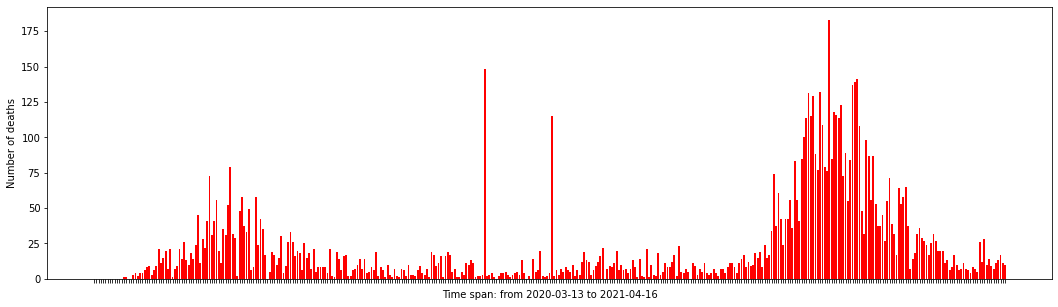

In [18]:
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels([])
plt.xlabel(f'Time span: from {time_range[-1]} to {time_range[0]}')
plt.ylabel(f'Number of deaths')
plt.bar(days, deaths, color='red')

Let's do the same thing for the 'confirmed' column.

In [19]:
confirmed_arr = np.sort(manaus['confirmed'].tolist())
confirmed = [x-confirmed_arr[indice-1] if indice > 0 else x for indice, x in enumerate(confirmed_arr)]

<BarContainer object of 395 artists>

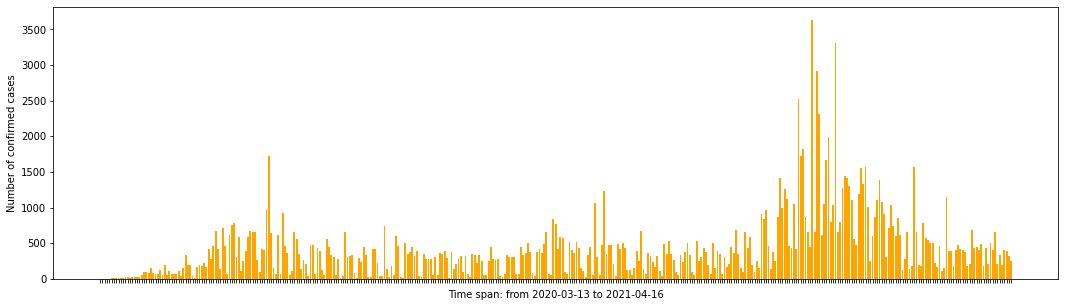

In [20]:
f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels([])
plt.xlabel(f'Time span: from {time_range[-1]} to {time_range[0]}')
plt.ylabel(f'Number of confirmed cases')
plt.bar(days, confirmed, color='orange')

From the plot of deaths, we can see the begning of everything and current situtation of COVID-19 in Manaus. It's really hard to see the reality that the data shows to us, but at the same time is very important. The spikes represent represent deaths of friends e relatives of mine and many others.

When COVID-19 arrived in Manaus, we saw many statements on masks, the importance of social isolation, but was not enough to control the pandemic and quickly things seemed to be out of control. The first wave is clearly can be easily seen. The confirmed cases graph shows us that hard reality with more numbers (range in y-axis), as we naturally had much more people getting sick than dying.

Two more things call for more detailed analysis:

(i) By midyear (2020) we see two big spikes on the graph of deaths, that came from a relatively low deaths rate.

(ii) In both graphs, by the end of December and beginning of January, came the second wave. Much more severe and tragic than the first. In fact, that happned due to lack of caution from the population, that broke social distancing to gather on Christmas and New Year's Eve¹ ² ³.

¹https://agencia.fapesp.br/second-wave-of-covid-19-in-manaus-rekindles-debate-on-herd-immunity/35011/<br>
²https://www.youtube.com/watch?v=wZmqZjU8BJ4 <br>
³https://www.abc.net.au/news/2021-03-01/inside-manaus-brazil-coronavirus-crisis-second-wave/13183706

Now we are going to explore a little bit the behaviour of our data by adding 5 consectuvies days in a row, for both deaths and confirmed cases. 

In [21]:
deaths_temp = np.array_split(deaths, 395//5)
deaths_5cd = np.sum(deaths_temp, axis=1)

#Alternative to split and sum:
#np.add.reduceat(deaths, range(0, len(deaths), 5))¹
#
#¹https://stackoverflow.com/questions/29391815/sum-slices-of-consecutive-values-in-a-numpy-array
#I personally don't like that implementation as 'array_split' and 'sum' is a much straightfoward approach
#and easier to understand, but I put here with the link just for the sake of curiosity

<ipython-input-22-89477b2e1603>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days[::5], rotation = 90)


<BarContainer object of 79 artists>

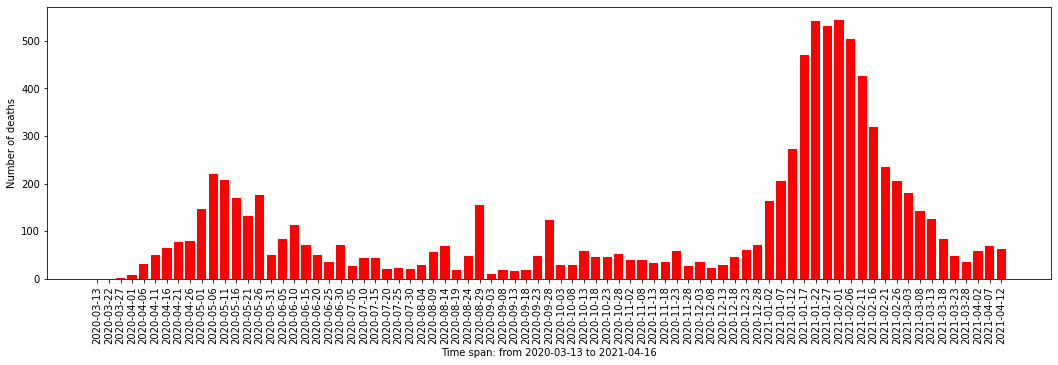

In [22]:
f, ax = plt.subplots(figsize=(18,5))
#We can now have labels for the x-axis as we have less data to be displayed
ax.set_xticklabels(days[::5], rotation = 90)
plt.xlabel(f'Time span: from {time_range[-1]} to {time_range[0]}')
plt.ylabel(f'Number of deaths')
plt.bar(days[::5], deaths_5cd, color='red')

<ipython-input-23-974f771d2395>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(days[::5], rotation = 90)


<BarContainer object of 79 artists>

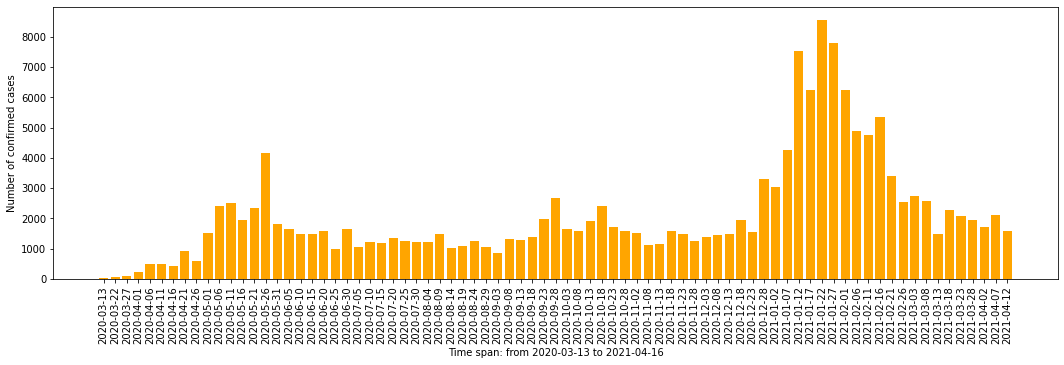

In [23]:
confirmed_5cd_temp = np.array_split(confirmed, 395//5)
confirmed_5cd = np.sum(confirmed_5cd_temp,axis=1)

f, ax = plt.subplots(figsize=(18,5))
ax.set_xticklabels(days[::5], rotation = 90)
plt.xlabel(f'Time span: from {time_range[-1]} to {time_range[0]}')
plt.ylabel(f'Number of confirmed cases')
plt.bar(days[::5], confirmed_5cd, color='orange')

A very important thing to be noticed is some kind of correspondence between the curves of both graphs. We can not imply that when we have high numbers of confirmed cases alones we will have a considerable number of deaths, or even that we are going to see any death at all. However, considering the events of the pandemic in Manaus, deaths and confirmed cases are strongly co-related. This can be derived not only by the graph, but also by the fact that COVID-19 is a highly infectious disease. It is possible to easily find several reports of people who got sick, developed symptoms and died, all in a short period of time. Nevertheless, even that could explain the co-relation of the spikes in both graphs, we can not forget how brazilian government played its role during the pandemic¹ (by federal and state representations). Corruption², vaccine line-cutting³ and much more.

¹https://bylinetimes.com/2020/06/10/the-coronavirus-crisis-corruption-negligence-and-harassment-in-brazil/ <br>
²https://www.wilsoncenter.org/event/update-manaus-covid-19-and-ongoing-public-health-crisis-amazon <br>
³https://brazilian.report/liveblog/coronavirus/2021/01/28/vaccine-line-cutting-scandals-challenge-latin-american-authorities/

Can we mix both graphs to visualize better how deaths and confirmed cases are related? Let's plot both data together.

<AxesSubplot:>

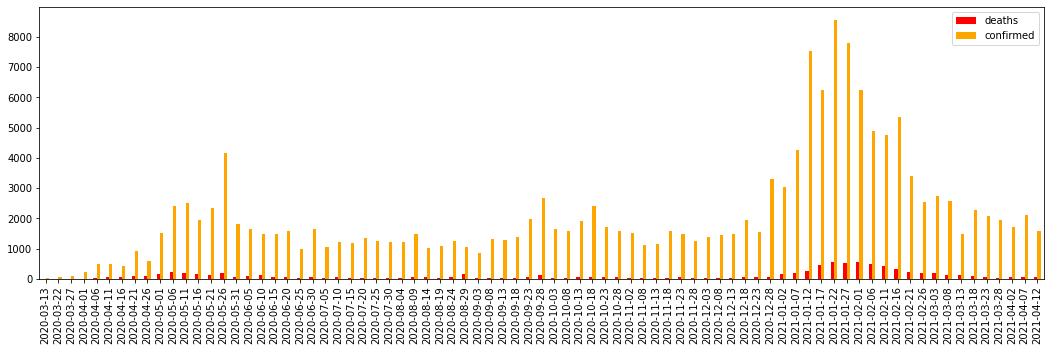

In [24]:
plotdata = pd.DataFrame({
    "deaths": deaths_5cd,
    "confirmed": confirmed_5cd
    },
    index = days[::5])

plotdata.plot(kind="bar", figsize=(18, 5), color=['r', 'orange'])

Well... something is wrong. We indeed plotted our both graphs together, but we can barely see the deaths because of the range of the data. We have much more confirmed cases than deaths. When plotted together we lost the possibility to study the relation between the graphs. Let's fix that by normalizating each array, so we can have both arrays in a range of between 0 and 1.

<AxesSubplot:>

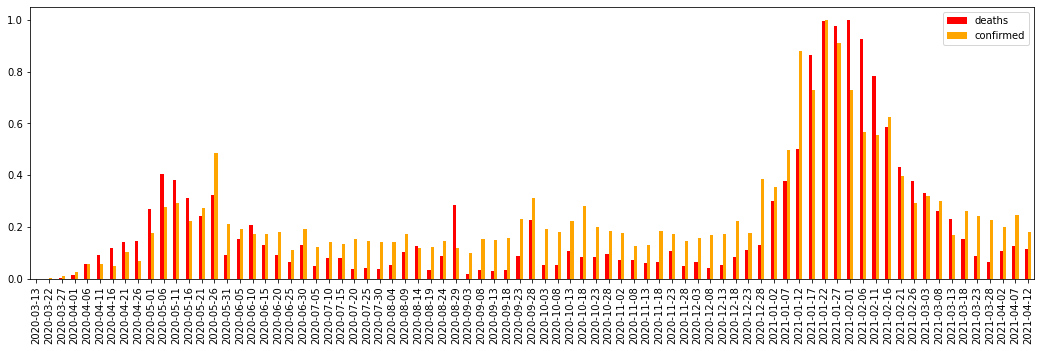

In [25]:
plotdata = pd.DataFrame({
    "deaths": (deaths_5cd - np.min(deaths_5cd)) / (np.max(deaths_5cd) - np.min(deaths_5cd)),
    "confirmed": (confirmed_5cd - np.min(confirmed_5cd)) / (np.max(confirmed_5cd) - np.min(confirmed_5cd)),
    },
    index = days[::5])

plotdata.plot(kind="bar", figsize=(18, 5), color=['r', 'orange'])

Much better! 

Now we can see how some kind of behaviour of the population is imprinted on the the numbers. In most occurrences we can see how both graphs exhibit equal behaviors.

Let's try to find also some other factor, for example: what are the most though days? 'Though', for us, will mean days that we had a high number of deaths and confirmed cases when considered the day before. As we are grouping 5 days in a row, we are going to compare chunks in a row. We also are going to consider a 'high' difference between days whe we had more than a 20% increase between chunks, because If we don't consider that we may have multiple occurrencies, especially in the beginning of the pandemic. For example, without the care of the 20% consideration we may have days where the increase is beyond 200% due to previous days having zero or very small events: 2 -> 9 (increase of 350%).

In [26]:
tough_daysi = []
deaths_pctg = []
for i, (deaths_temp, days_temp) in enumerate(zip(deaths_5cd, days[::5])):
    if i > 0 and deaths_5cd[i-1] > 0:
        diff = (deaths_temp - deaths_5cd[i-1])
        qtt = diff / (deaths_5cd[i-1])
        if qtt > 0.2 and diff > 15:
            tough_daysi.append(days_temp)
            deaths_pctg.append(deaths_temp)
            
tough_daysii = []
confirmed_pctg = []
for i, (confirmed_temp, days_temp) in enumerate(zip(confirmed_5cd, days[::5])):
    if i > 0 and confirmed_5cd[i-1] > 0:
        diff = (confirmed_temp - confirmed_5cd[i-1])
        qtt = diff / (confirmed_5cd[i-1])
        if qtt > 0.2 and diff > 15:
            tough_daysii.append(days_temp)
            confirmed_pctg.append(confirmed_temp)

<AxesSubplot:>

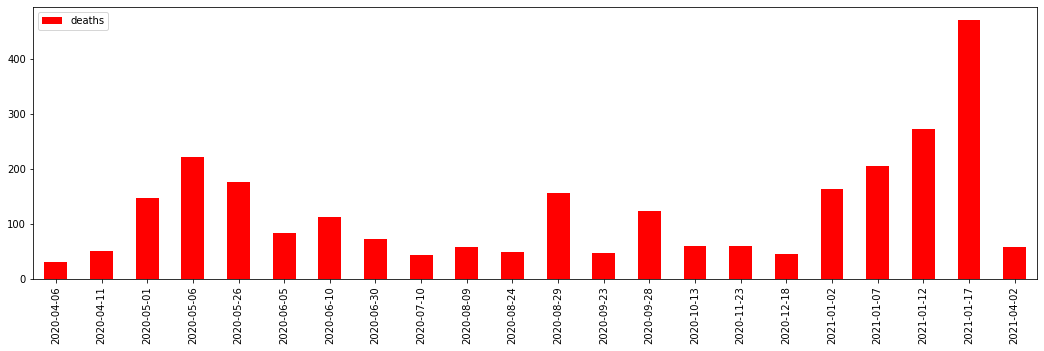

In [27]:
plotdata = pd.DataFrame({
    "deaths": deaths_pctg,
    },
    index = tough_daysi)

plotdata.plot(kind="bar", figsize=(18, 5), color='r')

<AxesSubplot:>

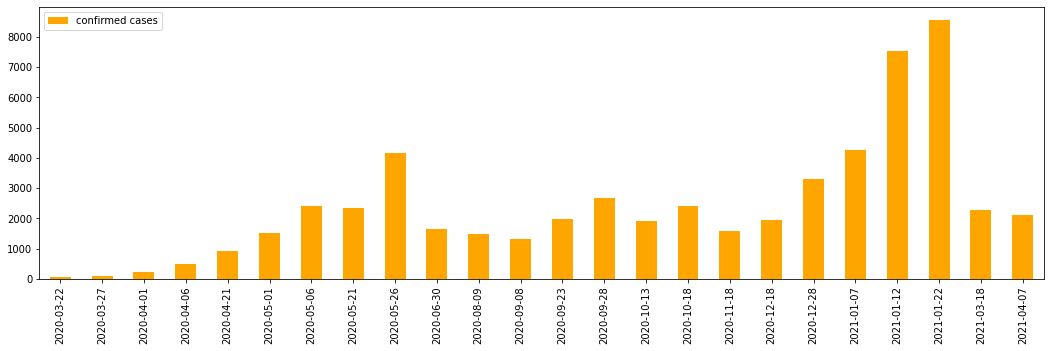

In [28]:
plotdata = pd.DataFrame({
    "confirmed cases": confirmed_pctg,
    },
    index = tough_daysii)

plotdata.plot(kind="bar", figsize=(18, 5), color='orange')

Some days matched in both graphs. With more 'outside' information we can even think in others theoris to explain each event. But I want to point out two incidents: January 7 (2021) and January 12 (2021). Those days are present not only in both days, but also in the period of the second wave with significant visual appearance: they are among the highest spikes. That leads to a very important fact that:*in the first few weeks of 2021, we had more deaths due COVID-19 than from the entire year of 2020 alone*¹. So we ask: when was the day that, in 2021, Manaus exceeded the number of deaths by COVID-19 in 2020?

¹(only in portuguese, PT-BR) https://g1.globo.com/am/amazonas/noticia/2021/03/03/em-dois-meses-de-2021-manaus-tem-mil-mortes-a-mais-do-que-em-2020.ghtml

In [29]:
year_2020 = [True  if ('2020' in x) else False for indice, x in enumerate(days_arr)]
year_2021 = [True  if ('2021' in x) else False for indice, x in enumerate(days_arr)]

In [30]:
print(f'Total deaths in 2020: {np.sum(deaths[year_2020])}.')
print(f'Total deaths in 2021: {np.sum(deaths[year_2021])}.')

Total deaths in 2020: 3380.
Total deaths in 2021: 5232.


In [31]:
tough_2020 = np.sum(deaths[year_2020])
months = {'January': 1, 'February': 2, 'March': 3, 'April': 4}
count_deaths = 0
for indice, (day, count_d) in enumerate(zip(days_arr, deaths)):
    if '2021' in day:
        count_deaths = count_deaths + count_d
        if count_deaths >= tough_2020:
            y, m, d = day.split('-')
            month = [x for x in months.keys() if months[x] == int(m)]
            print(f'The day we hit the mark of deaths in 2020 was {month[0]} {d}.')
            print(f'Total deaths by that day: {count_deaths}.')
            break

The day we hit the mark of deaths in 2020 was February 11.
Total deaths by that day: 3384.


 ### Future Works

Thank you for staying with me until here. As future works we can think about new new ways of mixing the data. We did not even look to others cities in Amazonas, or tried any Machine Learning approach to try to predict new waves of COVID-19 of Manaus. For sure, would be very interisting to see how our data can be related with data from around the world.

### End

I hope you are ok.

Stay safe.

Lucas.

You can reach me at lucasgabrielce [at] gmail dot com.